1. csv 폴더에서 Sales Records.csv 파일로드
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 제거 
3. 컬럼의 이름들을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']
4. 데이터의 결측치가 존재하는가?
5. 대륙, 국가를 기준으로 오름차순 정렬
6. 인덱스를 재지정(기존의 인덱스를 제거)
7. 새로운 파생변수 생성
    - 총단가 : 판매개수 * 단가
    - 총원가 : 판매개수 * 원가
    - 총이윤 : 총단가 - 총원가

In [1]:
import pandas as pd

In [2]:
# Sales Record.csv 파일을 로드
sales = pd.read_csv('../../csv/Sales Records.csv')

In [3]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [4]:
sales.drop(['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'], axis= 1, inplace=True)

In [5]:
sales.head()

,Region,Country,Item Type,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96
1,Europe,Latvia,Beverages,C,12/28/2015,1/23/2016,1075,47.45,31.79
2,Middle East and North Africa,Pakistan,Vegetables,C,1/13/2011,2/1/2011,6515,154.06,90.93
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,C,9/11/2012,10/6/2012,7683,668.27,502.54
4,Europe,Czech Republic,Beverages,C,10/27/2015,12/5/2015,3491,47.45,31.79


In [6]:
sales.columns = ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '판매개수', '단가', '원가']

In [7]:
sales.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96
1,Europe,Latvia,Beverages,C,12/28/2015,1/23/2016,1075,47.45,31.79
2,Middle East and North Africa,Pakistan,Vegetables,C,1/13/2011,2/1/2011,6515,154.06,90.93
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,C,9/11/2012,10/6/2012,7683,668.27,502.54
4,Europe,Czech Republic,Beverages,C,10/27/2015,12/5/2015,3491,47.45,31.79


In [8]:
# 결측치를 확인하는 3가지 방법 
# isna().sum() 
print(sales.isna().sum())

대륙      0
국가      0
상품종류    0
우선순위    0
주문일자    0
발송일자    0
판매개수    0
단가      0
원가      0
dtype: int64


In [9]:
# 통계요약 정보 출력 describe() # 숫자밖에 안나와서 얘만 가지고 결측치를 확인하는 것은 좋지 않다.
print(sales.describe())

               판매개수            단가            원가
count  10000.000000  10000.000000  10000.000000
mean    5002.855900    268.143139    188.806639
std     2873.246454    217.944092    176.445907
min        2.000000      9.330000      6.920000
25%     2530.750000    109.280000     56.670000
50%     4962.000000    205.700000    117.110000
75%     7472.000000    437.200000    364.690000
max    10000.000000    668.270000    524.960000


In [10]:
# info()
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대륙      10000 non-null  object 
 1   국가      10000 non-null  object 
 2   상품종류    10000 non-null  object 
 3   우선순위    10000 non-null  object 
 4   주문일자    10000 non-null  object 
 5   발송일자    10000 non-null  object 
 6   판매개수    10000 non-null  int64  
 7   단가      10000 non-null  float64
 8   원가      10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB
None


In [11]:
## 데이터를 백업
df = sales.copy()
df.head(1)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [12]:
df.sort_values(
    ['대륙','국가'],                                 # 묶어서 쓰지 않으면 대륙 다 정렬하고 그걸 다시 국가로 정렬해버린다.
    inplace = True
)
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
36,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67
246,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33
446,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93
569,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11
576,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96


In [13]:
df.reset_index(drop = True, inplace = True)
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96


In [14]:
df['총단가'] = df['판매개수'] * df['단가']
df.head(3)

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04


In [15]:
df['총원가'] = df['판매개수'] * df['원가']
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76


In [16]:
df['총이윤'] = df['총단가'] - df['총원가']
df.head()

,대륙,국가,상품종류,우선순위,주문일자,발송일자,판매개수,단가,원가,총단가,총원가,총이윤
0,Asia,Bangladesh,Personal Care,L,12/11/2016,1/13/2017,9420,81.73,56.67,769896.60,533831.40,236065.20
1,Asia,Bangladesh,Cosmetics,M,7/29/2010,9/11/2010,577,437.20,263.33,252264.40,151941.41,100322.99
2,Asia,Bangladesh,Vegetables,C,4/28/2014,5/5/2014,34,154.06,90.93,5238.04,3091.62,2146.42
3,Asia,Bangladesh,Cereal,L,6/22/2010,6/28/2010,9768,205.70,117.11,2009277.60,1143930.48,865347.12
4,Asia,Bangladesh,Office Supplies,H,3/20/2013,4/11/2013,7731,651.21,524.96,5034504.51,4058465.76,976038.75


1. 대륙별 총이윤의 합이 가장 높은 대륙은 어디인가?
2. 국가별 총이윤의 합이 가장 높은 상위 10개의 국가는 어디인가?
3. 어떤 상품이 가장 많이 팔렸을까?

In [17]:
# 대륙별 총이윤 합
# 대륙별 그룹화
## 그룹화 함수 : groupby([기준이 되는 컬럼])
# case1: 전체 데이터프레임에서 그룹화 -> 컬럼을 필터링
df.groupby(
    ['대륙']
).sum()['총이윤']  # 앞의 것은 스리즈 형태. [['총이윤']] 혹은 [['총이윤' , '총단가']]로 하면 dataframe 형태로 나온다. 

대륙
Asia                                 5.874033e+08
Australia and Oceania                3.240712e+08
Central America and the Caribbean    4.033578e+08
Europe                               1.027000e+09
Middle East and North Africa         5.099239e+08
North America                        9.949552e+07
Sub-Saharan Africa                   9.996421e+08
Name: 총이윤, dtype: float64

In [18]:
# case2 : 전체 데이터프레임에서 컬럼을 필터링 -> 그룹화                  # 아래가 더 빠른 코드일 것으로 예상됨
group_data = df[['대륙', '총이윤']].groupby(['대륙']).sum()

In [19]:
group_data.sort_values(['총이윤'],
                       ascending = False)
                       

,총이윤
대륙,
Europe,1.027000e+09
Sub-Saharan Africa,9.996421e+08
Asia,5.874033e+08
Middle East and North Africa,5.099239e+08
Central America and the Caribbean,4.033578e+08
Australia and Oceania,3.240712e+08
North America,9.949552e+07


In [20]:
## 이윤을 많이 내는 상위 10개 국가 출력
group_data2 = df[['국가', '총이윤']].groupby(['국가']).sum()

In [21]:
group_data2.sort_values(['총이윤'],
                      ascending = False, inplace = True)                     # 결과값 보면 위의 줄이 2개나 된다. 이는 국가들이 index이기 때문. index의 이름이 국가인 것.

In [22]:
group_data2.head(10)

,총이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
Botswana,29019726.67
Bangladesh,28092720.77
Lithuania,28063374.02
Burundi,27911293.45


In [23]:
## 한국의 등수는 몇 등일까?
# case1 : index는 list임으로 list 내장함수 (index())를 이용
indexs = list(group_data2.index)                             # 인덱스에도 이름이 붙을 수 있다. 
indexs.index('South Korea') + 1

48

In [24]:
# case2 : 인덱스를 초기화 (기존의 인덱스를 보존)
group_data3 = group_data2.reset_index()  
group_data3.loc[
    group_data3['국가'] == 'South Korea'
]

,국가,총이윤
47,South Korea,23893933.75


In [25]:
gr_con = df[['국가','판매개수']].groupby(['국가']).sum()

In [26]:
gr_con.sort_values(['판매개수'],
                   ascending= False,
                   inplace= True)

In [27]:
gr_con.head(10)

,판매개수
국가,
Taiwan,380647
Botswana,371019
Lithuania,367622
Croatia,357719
Kiribati,356731
Grenada,355886
Bahrain,352432
Canada,346910
Swaziland,345645


In [28]:
## 어떠한 상품 종류가 많이 팔렸는가?

# 그룹화 연산 
group_data4 = df[ ['상품종류', '판매개수']].groupby(['상품종류']).sum()


In [29]:
group_data4.sort_values(['판매개수'], ascending= False)


,판매개수
상품종류,
Personal Care,4402827
Clothes,4352350
Household,4336803
Vegetables,4238098
Cereal,4203394
Baby Food,4197006
Snacks,4122781
Office Supplies,4120263
Cosmetics,4103290


In [30]:
# 그룹화를 할 컬럼이 2개 이상인 경우
df[
    ['국가', '상품종류', '판매개수' ]
].groupby(
    ['국가', '상품종류']
).sum()

## 그룹화 연산도 2개 이상인 경우
df[
    ['국가', '상품종류', '판매개수' ]
].groupby(
    ['국가', '상품종류']
).agg(['sum', 'count'])

판매개수      
                               sum count
국가          상품종류                        
Afghanistan Baby Food         1368     1
            Beverages        14380     3
            Cereal           54917     9
            Clothes          29887     5
            Cosmetics        12177     4
...                            ...   ...
Zimbabwe    Meat              9640     1
            Office Supplies  17447     4
            Personal Care    18478     2
            Snacks           16314     3
            Vegetables       33945     5

[2198 rows x 2 columns]

In [31]:
## pivot_table()
# pandas에 내장된 함수
pd.pivot_table(
    df,
    index = '국가',                                             # 문자에 다 [] 붙여보기
    columns = '상품종류',
    values = '판매개수',
    aggfunc = 'sum',
    margins = True,                                         # index, col 끝에 All(합계) 붙이기 
    fill_value = 0
)

상품종류,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables,All
국가,,,,,,,,,,,,,
Afghanistan,1368,14380,54917,29887,12177,15791,32221,39330,18338,18899,26466,24832,288606
Albania,25985,22109,18580,30199,20375,26785,23705,28387,12623,35973,9154,11462,265337
Algeria,36393,10330,32498,21002,30506,17578,8482,15915,25956,24629,21037,21186,265512
Andorra,17592,22132,22618,6296,16156,41365,12839,14747,29795,42303,18764,6628,251235
Angola,36948,20666,34274,11404,22465,29812,8305,22134,5879,30464,51486,14129,287966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,25450,7981,20189,17880,14571,20686,26646,47200,31262,32229,30201,25822,300117
Yemen,22672,25690,15503,21235,7238,24168,31091,15098,6335,41380,15054,18350,243814
Zambia,51886,9825,21888,16282,22115,34906,24334,23886,30959,23469,28108,0,287658


In [32]:
import platform
import matplotlib.pyplot as plt

In [33]:
 
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='대륙'>

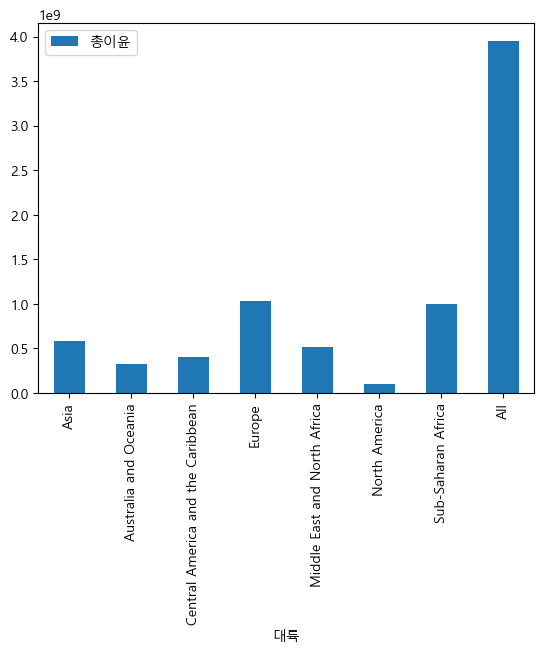

In [34]:
pivot_data = pd.pivot_table(
    df,
    index = '대륙',                                             
    values = '총이윤',
    aggfunc = 'sum',
    margins = True,
    fill_value = 0
)
pivot_data.plot(kind = 'bar')

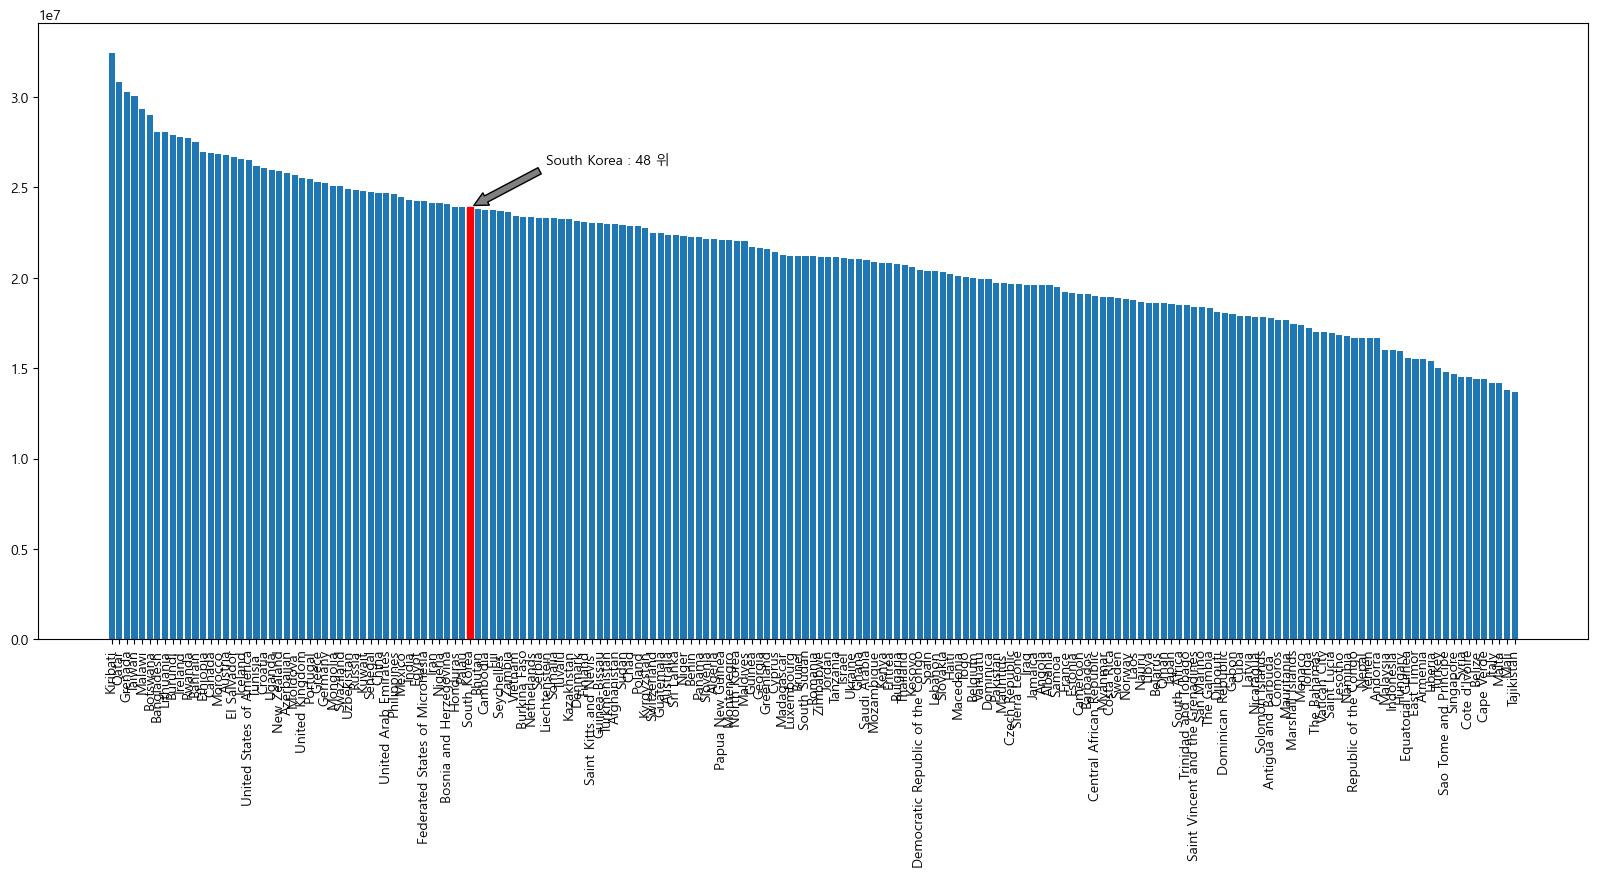

In [35]:
## group_data2를 가지고 그래프를 생성
# 막대 그래프 생성 
x = group_data2.index
y = group_data2['총이윤']

korea_rank = list(group_data2.index).index('South Korea')
korea_value = group_data2.loc['South Korea', '총이윤']


# 그래프 사이즈를 변경
plt.figure(figsize= (20, 8))
graph = plt.bar(x, y)
graph[korea_rank].set_color('r')
# x축의 데이터들을 회전
plt.xticks(rotation = 90)

# 그래프에 주석을 추가
plt.annotate(
    f"South Korea : {korea_rank + 1} 위",
    xy = (korea_rank, korea_value),                      # 화살표가 지정되는 좌표
    xytext = (korea_rank + 10, korea_value * 1.1 ),      # 주석의 좌표 
    arrowprops = {
        'facecolor' : 'gray',   # 화살표 내부의 색
        'edgecolor' : 'black',  # 화살표 테두리 색
        'headwidth' : 10 ,      # 화살표 머리의 너비
        'headlength' : 10,      # 화살표 머리의 길이
        'width' : 5,            # 화살표 꼬리의 너비
        'shrink' : 0.05         # 화살표가 위치하는 범위
    }                                                        # 인자값 바꿔보면서 확인
)
plt.show()